<a href="https://colab.research.google.com/github/LeoPich/Projects/blob/main/Programme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Il y a  51 sujets
Nombre d'essais pour chaque sujet:
 [np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376), np.int64(376)]
Il y a  21 mesures pour chaque essai
Nombre d'essais pour chaque sujet apres selection:
 [np.int64(188), np.int64(188), np.int64(188), np.int64(188), np.int64(188), np.int64(188), 

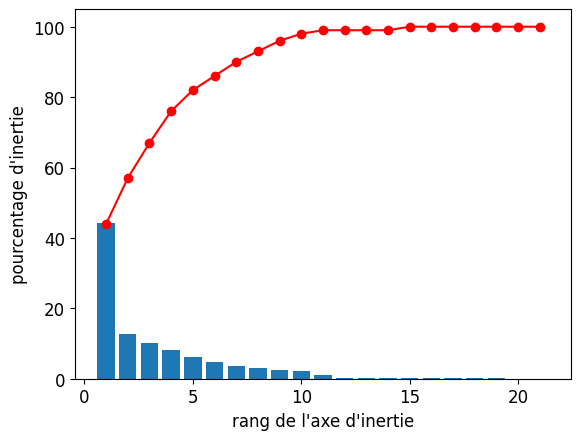

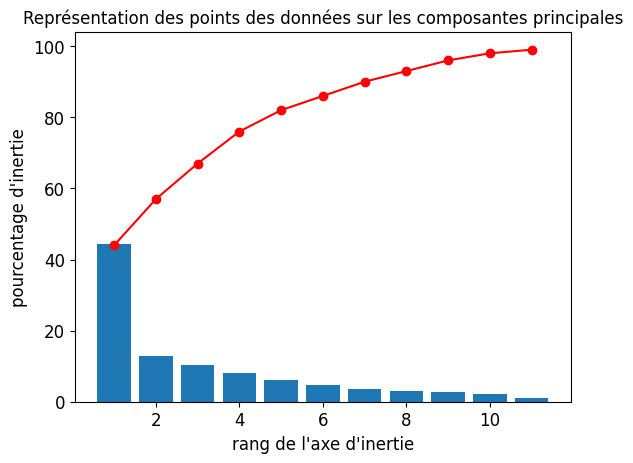

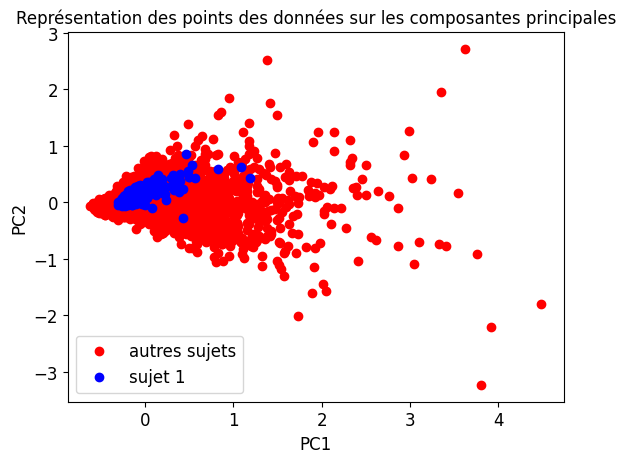

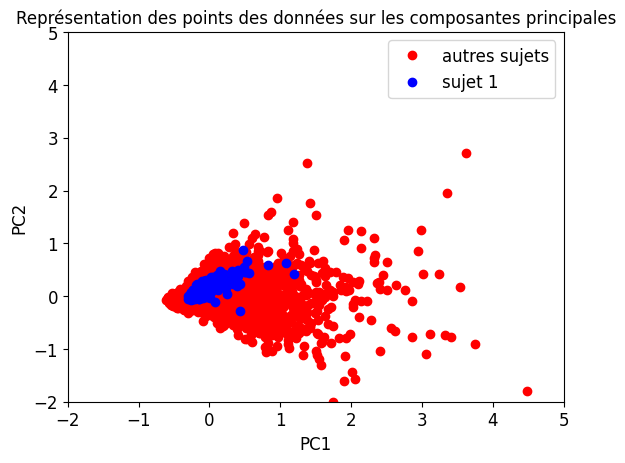

[0.31074117 0.1651761  0.05561834 0.04233605 0.04072364 0.03988114
 0.03437864 0.03228478 0.03130867 0.0293267  0.02789946 0.02711376
 0.02581303 0.02291392 0.02072331 0.01848043 0.01718125 0.01614059
 0.01589914 0.01439011 0.01166978]
[0.31074117 0.47591727 0.53153561 0.57387166 0.61459531 0.65447645
 0.68885509 0.72113987 0.75244853 0.78177523 0.80967468 0.83678844
 0.86260147 0.88551539 0.90623871 0.92471914 0.94190039 0.95804097
 0.97394011 0.98833022 1.        ]


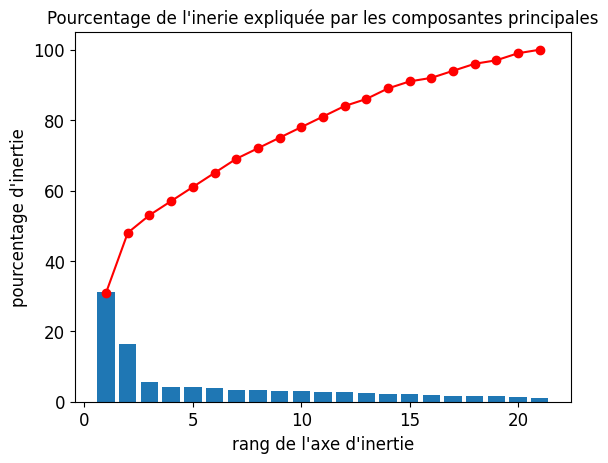

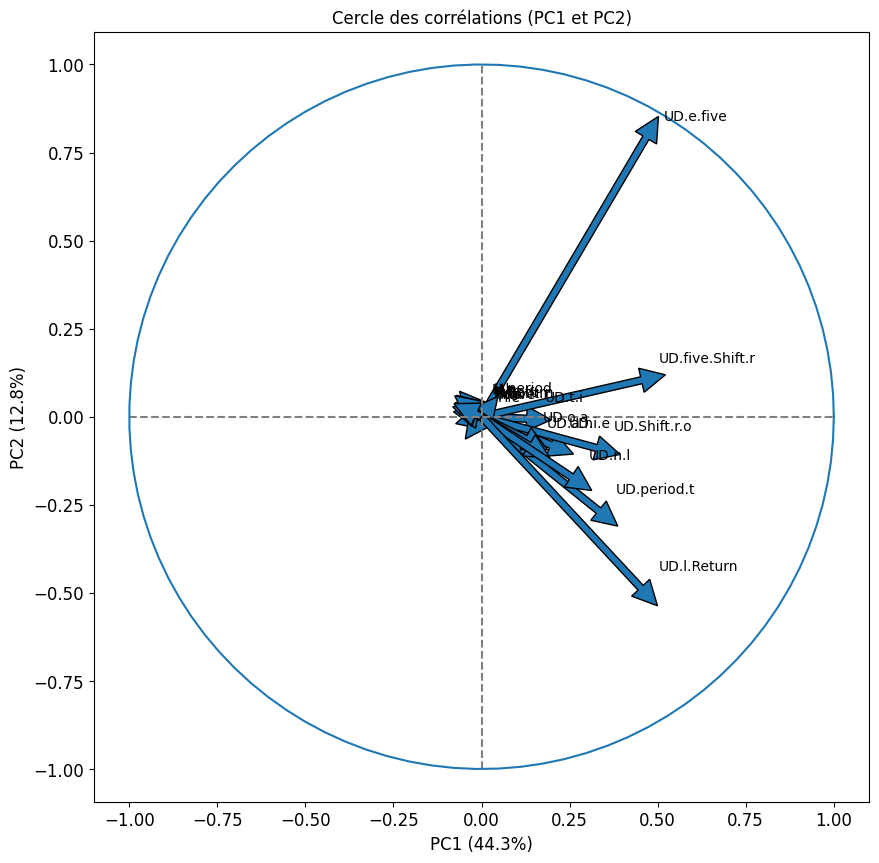

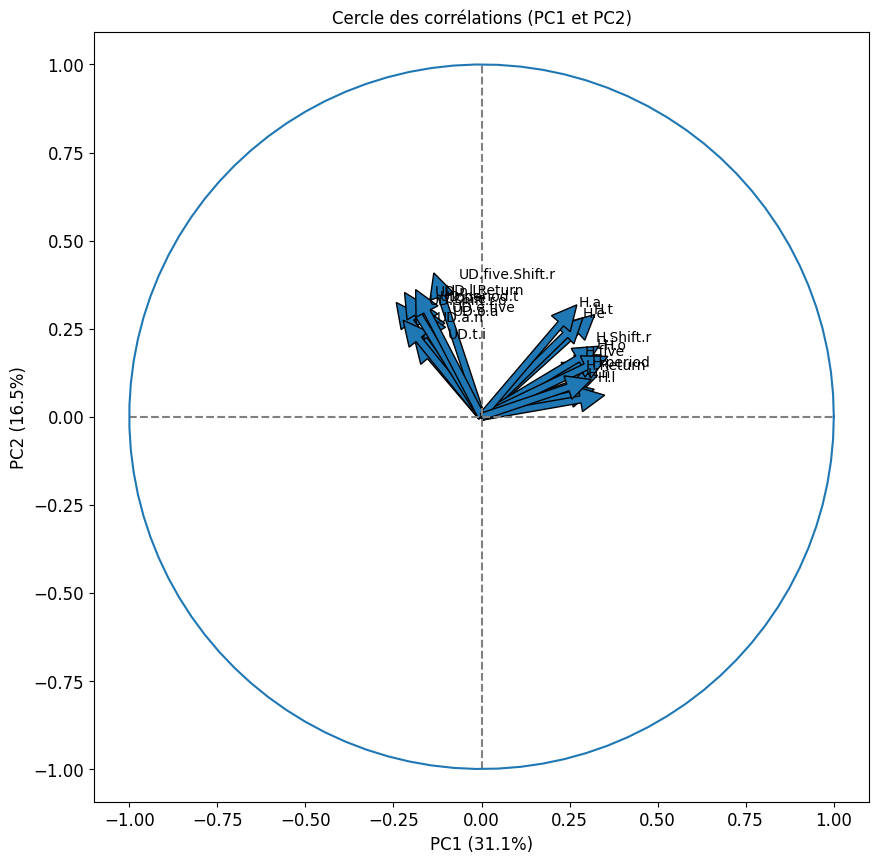

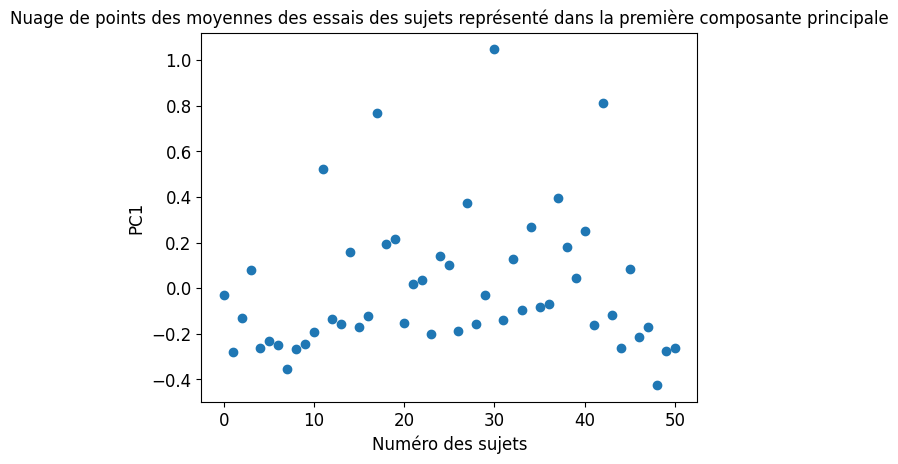

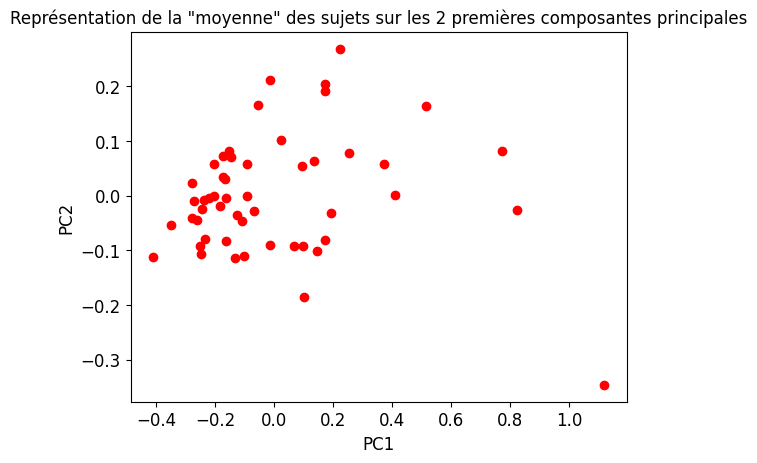

In [1]:
# Donnees: https://perso.univ-rennes1.fr/bernard.delyon/tp/KeyboardData1.csv

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

etudiant = 74909311
np.random.seed(etudiant)

# Lecture des donnees
nomvar=np.loadtxt("KeyboardData1.csv",delimiter=',',dtype='str',max_rows=1)[1:] #nom des variables
key=np.loadtxt("KeyboardData1.csv",delimiter=',',skiprows=1) #contient toutes les données numériques sauf le numéro du sujet

# Le tableau individus/variables et le vecteur des numeros de sujet pour chaque individu
X=key[:,1:] #Matrice des temps de frappe du clavier

y=key[:,0].astype(int) #Numéro du sujet
slist=np.unique(y) #Liste des sujets
ns=len(slist) # nombre de sujets
print('Il y a ',ns, 'sujets')
ne=sum(y==2) #Nombre d'occurence du sujet numéro 2 (376 essais)
print("Nombre d'essais pour chaque sujet:\n",[sum(y==l) for l in slist])
print('Il y a ',X.shape[1],'mesures pour chaque essai')


# On extrait désormais la moitié des essais de chacun
per=np.random.choice(ne,size=ne//2, replace=False) #On choisit aléatoirement 188 essais parmi les 376
select=np.tile(per,ns)+np.repeat(np.arange(ns)*ne,ne//2)
X=X[select,:]
y=y[select]


print("Nombre d'essais pour chaque sujet apres selection:\n",[sum(y==l) for l in slist])


#On considère la matrice de taille 51*21 qui contient la moyenne de chacune des mesures pour chacun des sujets
Mean_mat_individus = np.zeros((51,21))
for i in range(51):
    for j in range(21):
        Mean_mat_individus[i,j] = np.mean([X[p,j] for p in range(188*i,188*(i+1))])

###---ACP sur les données centré non réduite---###

scaler_center=StandardScaler(with_mean=True,with_std=False) #standaridsation sans remise à l'échelle

#Graphique représentant l'inertie expliquée par les composantes
X_center=scaler_center.fit_transform(X)
nb_components_center = 21
pca_center = PCA(n_components=nb_components_center)
pca_center.fit(X_center)
Xpca_center=pca_center.transform(X_center)
pca_center.get_precision()
print(pca_center.explained_variance_ratio_)
print(np.cumsum(pca_center.explained_variance_ratio_))
scree_center = (pca_center.explained_variance_ratio_*100).round(2)
scree_cum_center = scree_center.cumsum().round()
x_list_center = range(1, nb_components_center+1)
list(x_list_center)
plt.bar(x_list_center, scree_center)
plt.plot(x_list_center, scree_cum_center,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie", fontsize = 12)
plt.ylabel("pourcentage d'inertie", fontsize = 12)
plt.tick_params(axis='both', labelsize=12)
plt.show(block=False)

#Graphique représentant l'inertie expliquée par les 11 premières composantes
nb_components_center = 11
pca_center = PCA(n_components=nb_components_center)
pca_center.fit(X_center)
Xpca_center=pca_center.transform(X_center)
pca_center.get_precision()
scree_center = (pca_center.explained_variance_ratio_*100).round(2)
scree_cum_center = scree_center.cumsum().round()
x_list_center = range(1, nb_components_center+1)
list(x_list_center)
plt.bar(x_list_center, scree_center)
plt.plot(x_list_center, scree_cum_center,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie", fontsize = 12)
plt.ylabel("pourcentage d'inertie", fontsize = 12)
plt.title('Représentation des points des données sur les composantes principales', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show(block=False)

#Nuage de points représentant le sujet 1 en bleu parmi les autres sujets dans le plan formé par les 2 premières composantes de l'ACP
plt.plot(Xpca_center[188:,0],Xpca_center[188:,1],'o',color='red',label='autres sujets')
plt.plot(Xpca_center[:188,0],Xpca_center[:188,1],'o',color='blue',label='sujet 1')
plt.xlabel('PC1',fontsize = 12)
plt.ylabel('PC2',fontsize = 12)
plt.title('Représentation des points des données sur les composantes principales',fontsize = 12)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

#La présence d'un outlier dégrade la qualité du graphique, on décide donc de "rogner" l'image

plt.xlim(-2,5)
plt.ylim(-2,5)
plt.plot(Xpca_center[188:,0],Xpca_center[188:,1],'o',color='red',label='autres sujets')
plt.plot(Xpca_center[:188,0],Xpca_center[:188,1],'o',color='blue',label='sujet 1')
plt.xlabel('PC1',fontsize=12)
plt.ylabel('PC2' ,fontsize=12)
plt.title('Représentation des points des données sur les composantes principales', fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()


###---ACP sur les données standardisées---###

scaler_scaled=StandardScaler(with_mean=True,with_std=True)


X_scaled=scaler_scaled.fit_transform(X)
nb_components_scaled= 21
pca_scaled = PCA(n_components=nb_components_scaled)
pca_scaled.fit(X_scaled)
Xpca_scaled=pca_scaled.transform(X_scaled)
pca_scaled.get_precision()
print(pca_scaled.explained_variance_ratio_)
print(np.cumsum(pca_scaled.explained_variance_ratio_))
scree_scaled = (pca_scaled.explained_variance_ratio_*100).round(2)
scree_cum_scaled = scree_scaled.cumsum().round()
x_list_scaled = range(1, nb_components_scaled+1)
list(x_list_scaled)
plt.bar(x_list_scaled, scree_scaled)
plt.plot(x_list_scaled, scree_cum_scaled,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie", fontsize = 12)
plt.ylabel("pourcentage d'inertie", fontsize = 12)
plt.title("Pourcentage de l'inerie expliquée par les composantes principales",fontsize = 12)
plt.tick_params(axis='both', labelsize=12)
plt.show(block=False)


#Décomposition en valeur singulière, pour obtenir la matrice V donnant les informations sur les premières composantes de l'ACP

U_center,D_center,VT_center= np.linalg.svd(X_center)
V_center=np.transpose(VT_center)
V1_center=[]
V2_center=[]
Vi_center=[]
for i in V_center:
    V1_center.append(round(i[0],2))
    V2_center.append(round(i[1],2))
    Vi_center.append(round(i[6],2))
#print('V1=',V1_center)
#print("V2=",V2_center)

U_scaled,D_scaled,VT_scaled= np.linalg.svd(X_scaled)
V_scaled=np.transpose(VT_scaled)
V1_scaled=[]
V2_scaled=[]
Vi_scaled=[]
for i in V_scaled:
    V1_scaled.append(round(i[0],2))
    V2_scaled.append(round(i[1],2))
    Vi_scaled.append(round(i[6],2)) #pour obtenir la ième composante de l'acp
#print('V1_scaled=',V1_scaled)
#print("V2_scaled=",V2_scaled)

#Cercle de correlation pour les données centrées

x_1, x_2 = 0,1

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(0, pca_center.components_.shape[1]):
    ax.arrow(0,
              0,
              pca_center.components_[0, i],  #0 for PC1
              pca_center.components_[1, i],  #1 for PC2
              head_width=0.07,
              head_length=0.07,
              width=0.02,              )

    plt.text(pca_center.components_[0, i] + 0.05,
              pca_center.components_[1, i] + 0.05,
              nomvar[i])


plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.xlabel('PC{} ({}%)'.format(x_1+1, round(100*pca_center.explained_variance_ratio_[x_1],1)),fontsize = 12)
plt.ylabel('PC{} ({}%)'.format(x_2+1, round(100*pca_center.explained_variance_ratio_[x_2],1)),fontsize = 12)

plt.title("Cercle des corrélations (PC{} et PC{})".format(x_1+1, x_2+1),fontsize = 12)


intervalle = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(intervalle), np.sin(intervalle))
plt.axis('equal')
plt.tick_params(axis='both', labelsize=12)
plt.show(block=False)

#Cercle de correlation pour les données standardisées

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(0, pca_scaled.components_.shape[1]):
    ax.arrow(0,
              0,
              pca_scaled.components_[0, i],  #0 for PC1
              pca_scaled.components_[1, i],  #1 for PC2
              head_width=0.07,
              head_length=0.07,
              width=0.02,              )

    plt.text(pca_scaled.components_[0, i] + 0.05,
              pca_scaled.components_[1, i] + 0.05,
              nomvar[i])


plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlabel('PC{} ({}%)'.format(x_1+1, round(100*pca_scaled.explained_variance_ratio_[x_1],1)),fontsize = 12)
plt.ylabel('PC{} ({}%)'.format(x_2+1, round(100*pca_scaled.explained_variance_ratio_[x_2],1)),fontsize = 12)
plt.title("Cercle des corrélations (PC{} et PC{})".format(x_1+1, x_2+1),fontsize = 12)
plt.plot(np.cos(intervalle), np.sin(intervalle))
plt.axis('equal')
plt.tick_params(axis='both', labelsize=12)
plt.show(block=False)


#Nuage de point de l'ensemble des moyennes des essais des individus

Xpca_center_mean=np.zeros((51,1))
for i in range(51):
    Xpca_center_mean[i,0]=np.mean([Xpca_center[p,0] for p in range(188*i,188*(i+1))])

plt.plot(Xpca_center_mean,'o')
plt.xlabel("Numéro des sujets",fontsize=12)
plt.ylabel("PC1",fontsize=12)
plt.title("Nuage de points des moyennes des essais des sujets représenté dans la première composante principale", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()


#Représentation de la "moyenne" des sujets dans le plan PC1 et PC2

Mean_mat_individus_center=scaler_center.fit_transform(Mean_mat_individus)
n_components = 2
pca_Mean_mat_individus_center = PCA(n_components=n_components)
pca_Mean_mat_individus_center.fit(Mean_mat_individus_center)
Xpca_Mean_mat_individus_center_pca=pca_Mean_mat_individus_center.transform(Mean_mat_individus_center)
pca_Mean_mat_individus_center.get_precision()

plt.plot(Xpca_Mean_mat_individus_center_pca[1:,0],Xpca_Mean_mat_individus_center_pca[1:,1],'o',color='red',label='autres sujets')
plt.plot(Xpca_Mean_mat_individus_center_pca[0,0],Xpca_Mean_mat_individus_center_pca[0,1],'o',color='red',label='sujet 1')
plt.xlabel('PC1', fontsize = 12)
plt.ylabel('PC2', fontsize = 12)
plt.title('Représentation de la "moyenne" des sujets sur les 2 premières composantes principales',fontsize = 12)
plt.tick_params(axis='both', labelsize=12)
plt.show()










Taux d'erreur:  0.02


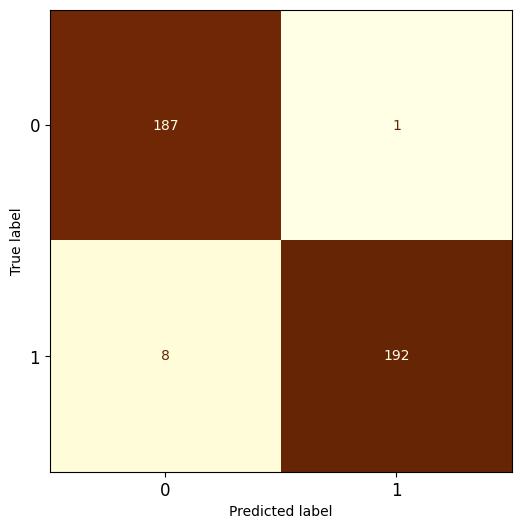

Moyenne des taux de prédiction juste: 0.9614709851551956


<ipython-input-2-d2d1eb336194>:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tmp, labels=(f"sujet {k}","les autres"),widths=.8)


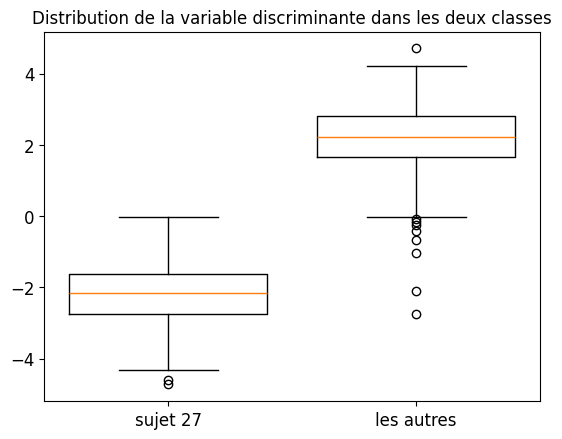

In [2]:
#Classification seul contre tous
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import seaborn as sns

np.random.seed(etudiant)

k=27 #Numéro du sujet

lda = LinearDiscriminantAnalysis()

X_train=np.zeros((188 + 4*50,21)) #on conserve 4 essais poiur chaques sujets intrus
y_train=np.zeros((188 + 4*50))


for i in range (188) :
    y_train[i]=0
    X_train[i:(i+1),:]=X[k*188+i:k*188+(i+1),:]
for i in range (51) :
    if i !=k:
        X_train[188+4*i:188+(4*i+4),:]=X[188*(i+1):188*(i+1)+4,:]
y_train[188:]=1

lda.fit(X_train,y_train)
yhat = lda.predict(X_train)
erreur=sum(y_train!=yhat)/len(y_train)
print("Taux d'erreur: ",round(erreur,2))
plt.rcParams.update({'figure.figsize': (6,6),'font.size': 10})
confusion_mat =  confusion_matrix(y_train,yhat)
ConfusionMatrixDisplay(confusion_mat).plot(cmap='YlOrBr',colorbar=False)
plt.tick_params(axis='both', labelsize=12)
plt.show()
plt.rcdefaults()

mean_score_valcroise=cross_val_score(lda, X_train,y_train,cv=10)
print("Moyenne des taux de prédiction juste:",np.mean(mean_score_valcroise))

C = lda.fit_transform(X_train,y_train)[:,0].reshape((-1,))
tmp = [C[np.where(y_train==0)[0]],C[np.where(y_train==1)[0]]]
plt.figure()
plt.boxplot(tmp, labels=(f"sujet {k}","les autres"),widths=.8)
plt.title("Distribution de la variable discriminante dans les deux classes", fontsize=12)
plt.tick_params(axis='both', labelsize=12)





Classe 1  : 0 1 2 4 5 6 7 8 9 10 12 13 15 16 20 23 26 28 29 31 33 35 36 41 43 44 46 47 48 49 50
Classe 2  : 17 30 42
Classe 3  : 3 11 14 18 19 21 22 24 25 27 32 34 37 38 39 40 45


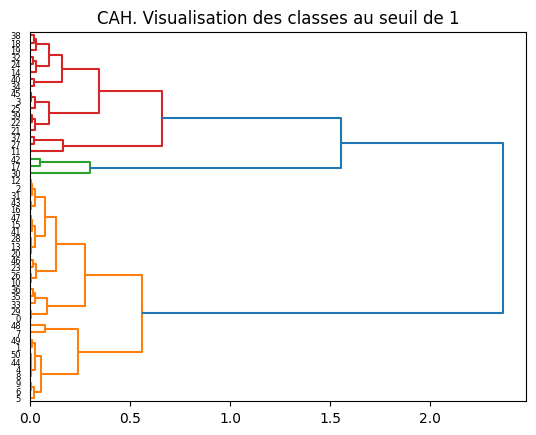

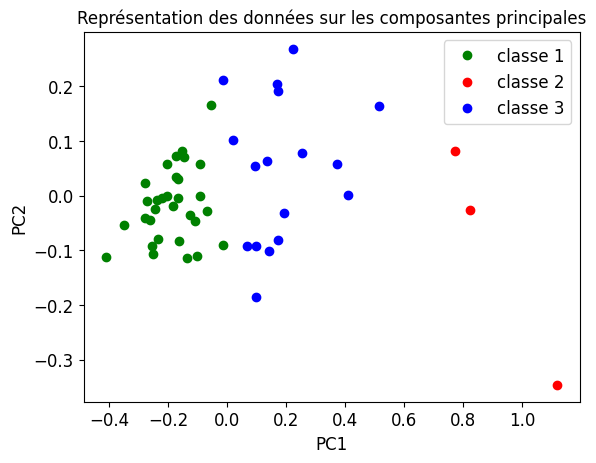

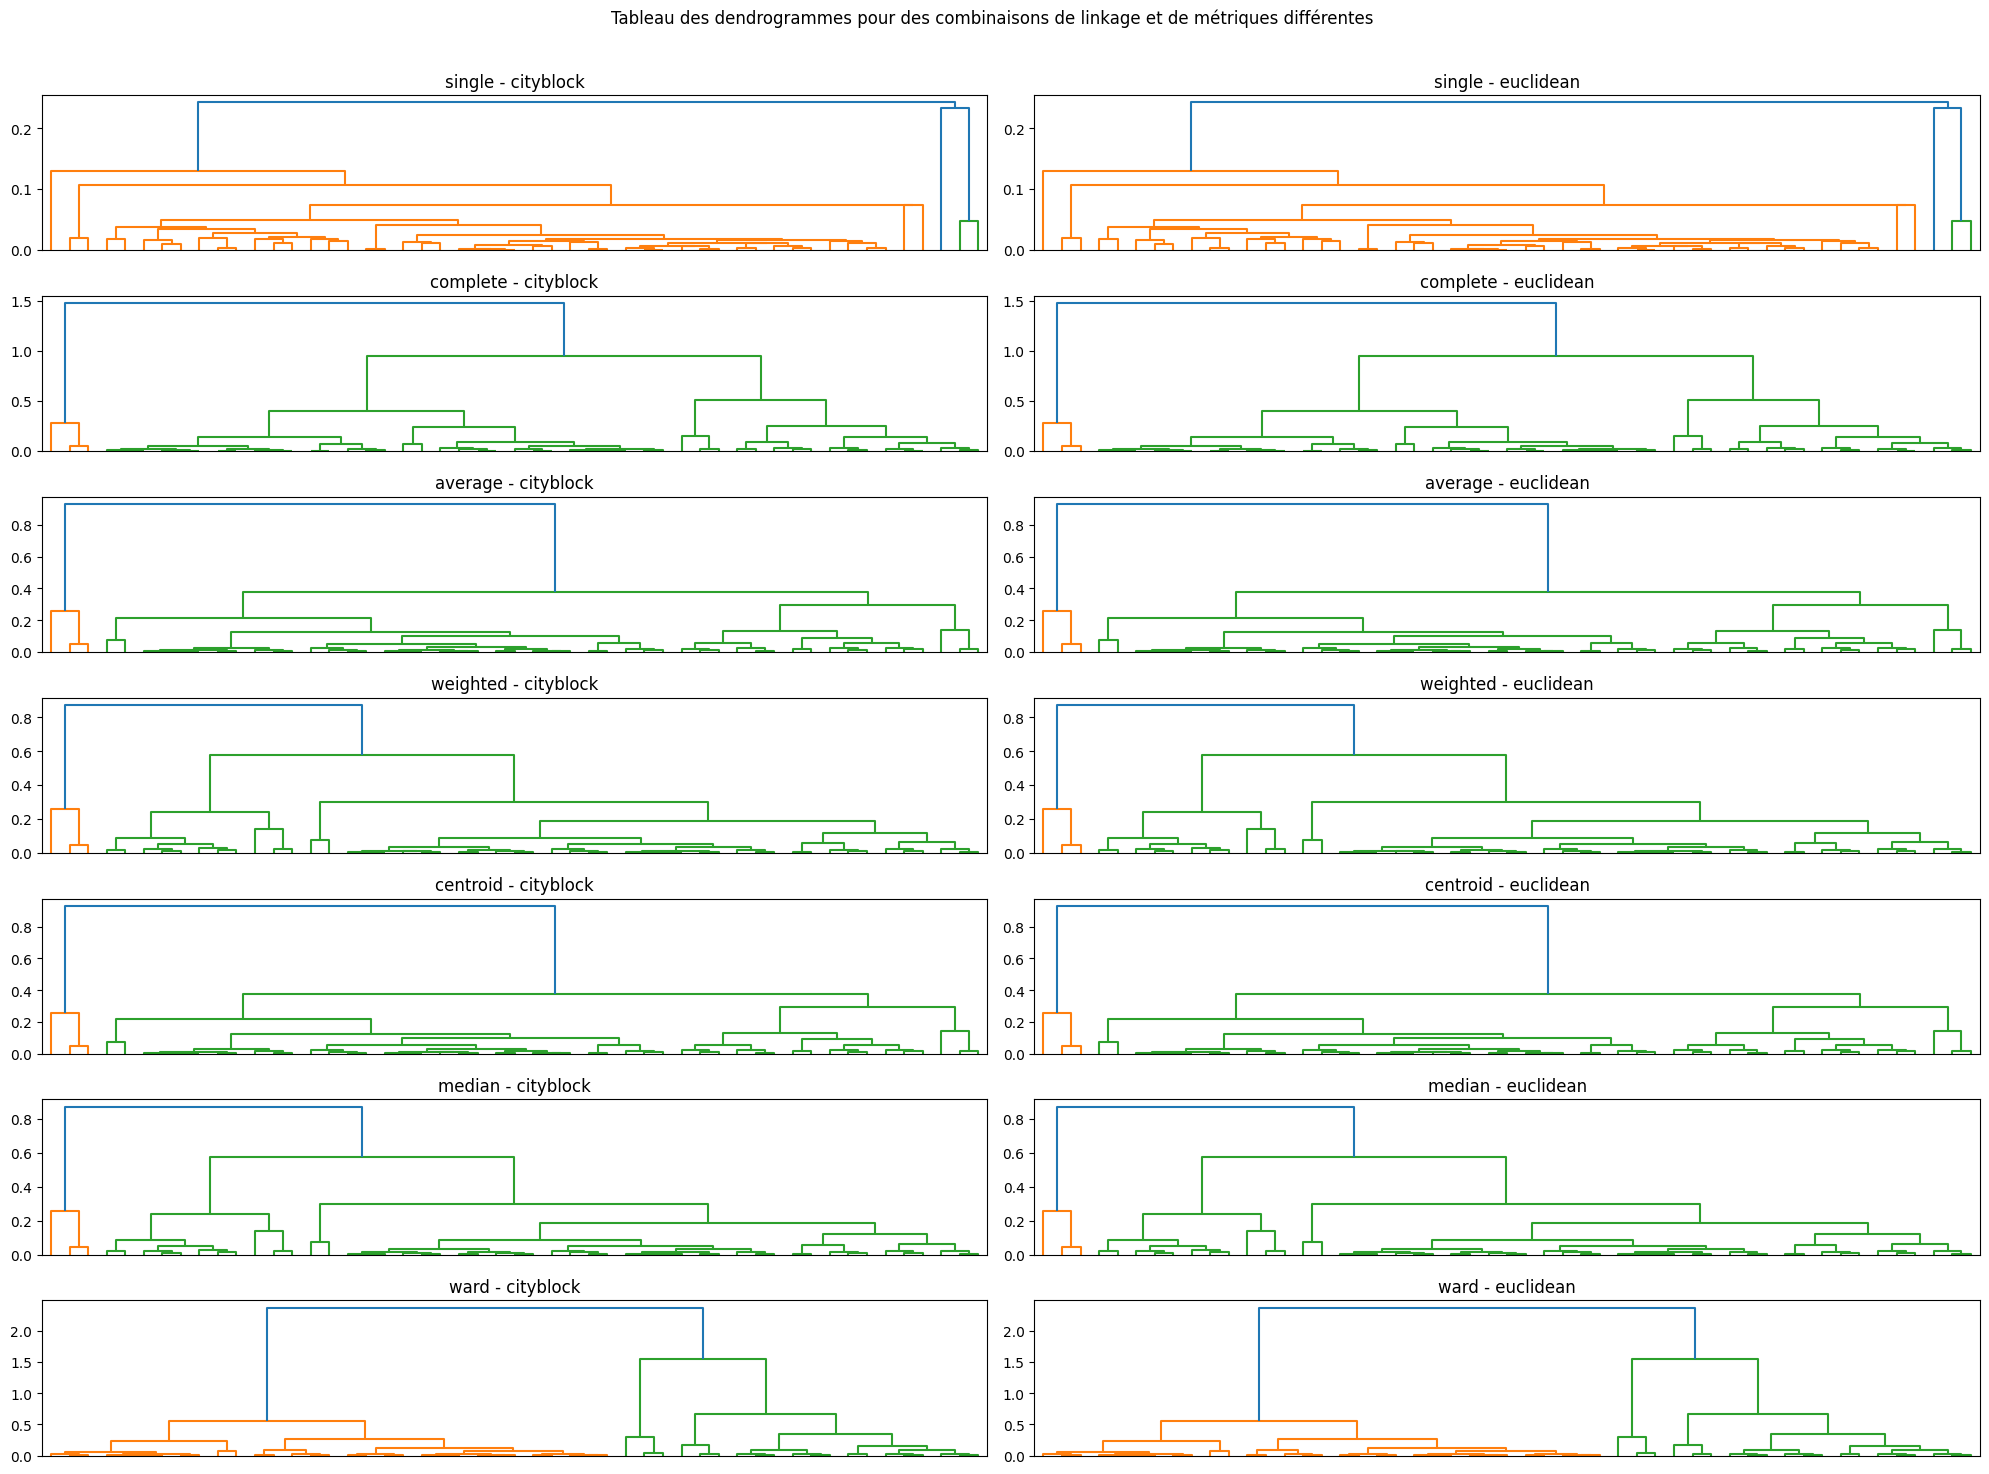

Classe 1  : 0 1 2 4 5 6 7 8 9 10 12 13 15 16 20 23 26 28 29 31 33 35 36 41 43 44 46 47 48 49 50
Classe 2  : 11 17 30 42
Classe 3  : 3 14 18 19 21 22 24 25 27 32 34 37 38 39 40 45
Taux d'erreur:  0.096


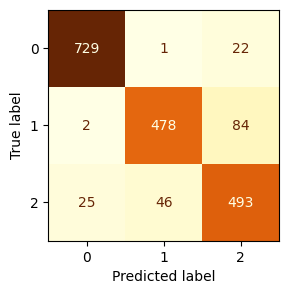

taux de bien prédits en moyenne: 0.8569148936170213


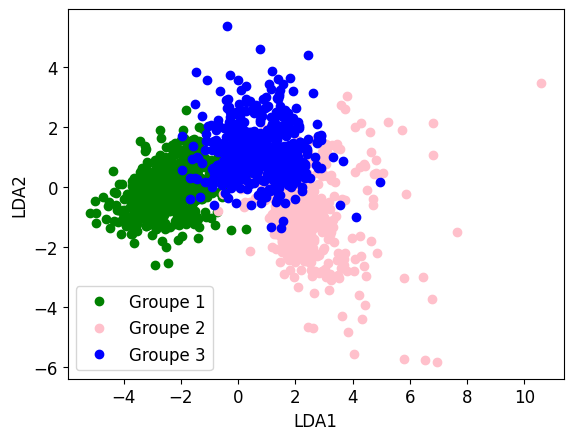

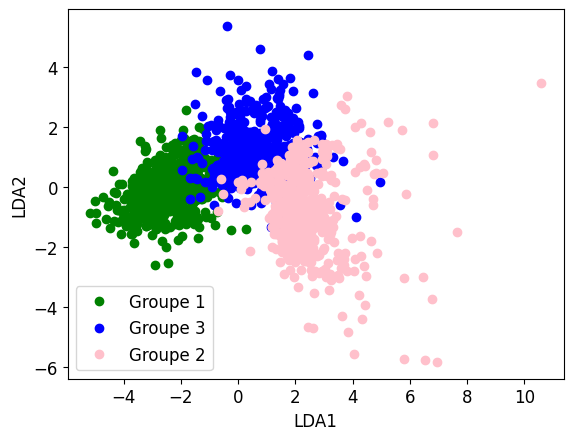

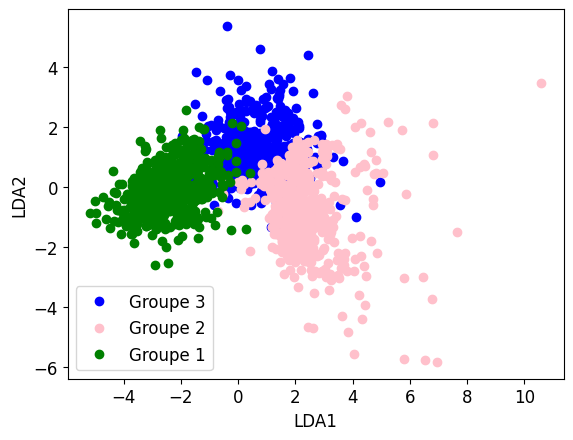

In [3]:
#CAH et k-means
np.random.seed(etudiant)

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import  KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist


M=linkage(Xpca_center_mean,method='ward',metric='euclidean')

Y_sujet=[i for i in range(51)]
seuil=1
plt.figure()
plt.title('CAH. Visualisation des classes au seuil de '+str(seuil),fontsize=12)
d=dendrogram(M,labels=list(Y_sujet),orientation='right',color_threshold=seuil)

groupes=fcluster(M,t=seuil,criterion='distance')
color=['black','red','blue','green','orange','pink']

for p in range(1,np.max(groupes)+1):
    print('Classe '+str(p).ljust(3,' ')+': ', end='')
    print(*np.array(Y_sujet)[np.where(groupes==p)])

plt.figure()
plt.plot(Xpca_Mean_mat_individus_center_pca[np.where(groupes==1)][:,0],Xpca_Mean_mat_individus_center_pca[np.where(groupes==1)][:,1],'o',color='green',label='classe 1')
plt.plot(Xpca_Mean_mat_individus_center_pca[np.where(groupes==2)][:,0],Xpca_Mean_mat_individus_center_pca[np.where(groupes==2)][:,1],'o',color='red',label='classe 2')
plt.plot(Xpca_Mean_mat_individus_center_pca[np.where(groupes==3)][:,0],Xpca_Mean_mat_individus_center_pca[np.where(groupes==3)][:,1],'o',color='blue',label='classe 3')
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2' , fontsize=12)
plt.title('Représentation des données sur les composantes principales',fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

linkage_methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]
distance_metrics = ["cityblock", "euclidean"]


valid_combinations = [(link, metric) for link in linkage_methods for metric in distance_metrics]

fig, axes = plt.subplots(len(linkage_methods), len(distance_metrics), figsize=(20, 15))
fig.suptitle("Tableau des dendrogrammes pour des combinaisons de linkage et de métriques différentes ", fontsize=12)

for i, link in enumerate(linkage_methods):
    for j, metric in enumerate(distance_metrics):
        if (link, metric) in valid_combinations:
            ax = axes[i, j]

            distances = pdist(Xpca_center_mean, metric=metric)

            dist_matrix = squareform(distances)

            dist_matrix = np.nan_to_num(dist_matrix)

            condensed_dist_matrix = squareform(dist_matrix)

            M = linkage(condensed_dist_matrix, method=link)

            dendrogram(M, ax=ax, no_labels=True)
            ax.set_title(f"{link} - {metric}", fontsize=12)
        else:
            axes[i, j].axis("off")


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

nclus=np.max(groupes)
k_means = KMeans(init='k-means++', n_clusters=nclus, n_init=5)
k_means.fit(Xpca_center_mean)
for p in range(nclus):
    print('Classe '+str(p+1).ljust(3,' ')+': ', end='')
    print(*np.array(Y_sujet)[np.where(k_means.labels_==p)])

nbsujets=10
ListeSuj=[]
GroupesSuj=np.zeros((nbsujets,1))
for i in range(nbsujets):
    c=np.random.choice(np.where(groupes==(i%3+1))[0])
    while c in ListeSuj:
        c=np.random.choice(np.where(groupes==(i%3+1))[0])
    ListeSuj.append(c)
    GroupesSuj[i,0]=i%3+1

Xsuj=np.zeros((188*nbsujets,21))
Ysuj=np.zeros(188*nbsujets)
for i in range(nbsujets):
    Xsuj[188*i:188*(i+1),:]=X[188*ListeSuj[i]:188*(ListeSuj[i]+1),:]
    Ysuj[188*i:188*(i+1)]=GroupesSuj[i]



lda_kmean = LinearDiscriminantAnalysis()
lda_kmean.fit(Xsuj,Ysuj)#
yhat_kmean = lda_kmean.predict(Xsuj)#
errl=sum(Ysuj!=yhat_kmean)/len(Ysuj) #
print("Taux d'erreur: ",round(errl,3))
plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
confusion_mat =  confusion_matrix(Ysuj,yhat_kmean) #
ConfusionMatrixDisplay(confusion_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

score=cross_val_score(lda, Xsuj,Ysuj,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))

LDA_1= lda.fit_transform(Xsuj,Ysuj)[:,0].reshape((-1,))
LDA_2=lda.fit_transform(Xsuj, Ysuj)[:,1].reshape((-1,))
LDA_11=np.zeros(188*3)
LDA_12=np.zeros(188*3)
LDA_13=np.zeros(188*3)
LDA_21=np.zeros(188*3)
LDA_22=np.zeros(188*3)
LDA_23=np.zeros(188*3)

for i in range(3):
    LDA_11[188*i:188*(i+1)]=LDA_1[188*(3*i):188*(3*i+1)]
    LDA_12[188*i:188*(i+1)]=LDA_1[188*(3*i+1):188*(3*i+2)]
    LDA_13[188*i:188*(i+1)]=LDA_1[188*(3*i+2):188*(3*i+3)]
    LDA_21[188*i:188*(i+1)]=LDA_2[188*(3*i):188*(3*i+1)]
    LDA_22[188*i:188*(i+1)]=LDA_2[188*(3*i+1):188*(3*i+2)]
    LDA_23[188*i:188*(i+1)]=LDA_2[188*(3*i+2):188*(3*i+3)]

plt.plot(LDA_11,LDA_21,'o',color='green',label='Groupe 1')
plt.plot(LDA_12,LDA_22,'o',color='pink',label='Groupe 2')
plt.plot(LDA_13,LDA_23,'o',color='blue',label='Groupe 3')
plt.xlabel("LDA1", fontsize=12)
plt.ylabel('LDA2',fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

plt.plot(LDA_11,LDA_21,'o',color='green',label='Groupe 1')
plt.plot(LDA_13,LDA_23,'o',color='blue',label='Groupe 3')
plt.plot(LDA_12,LDA_22,'o',color='pink',label='Groupe 2')
plt.xlabel("LDA1",fontsize=12)
plt.ylabel('LDA2',fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

plt.plot(LDA_13,LDA_23,'o',color='blue',label='Groupe 3')
plt.plot(LDA_12,LDA_22,'o',color='pink',label='Groupe 2')
plt.plot(LDA_11,LDA_21,'o',color='green',label='Groupe 1')
plt.xlabel("LDA1",fontsize=12)
plt.ylabel('LDA2',fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()





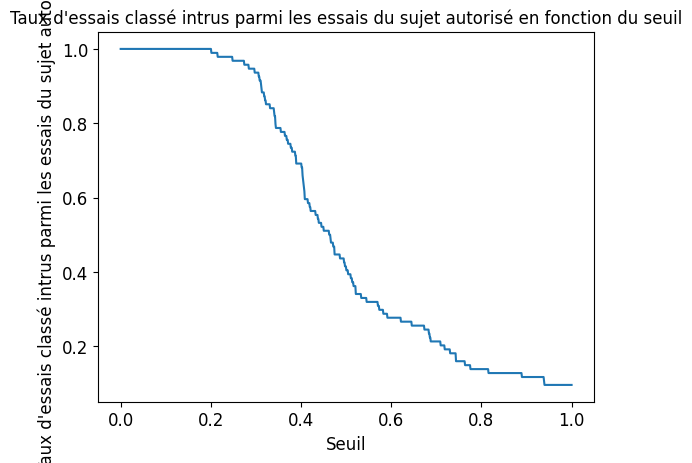

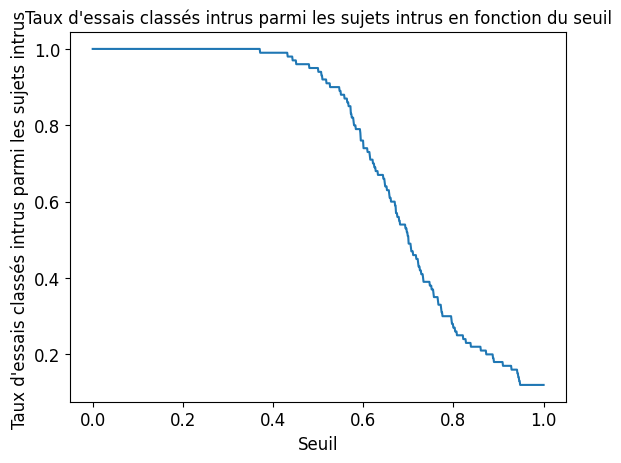

Taux de fausses alertes: 0.5531914893617021
Taux d imposteurs non considéré comme tel: 0.024893617021276595


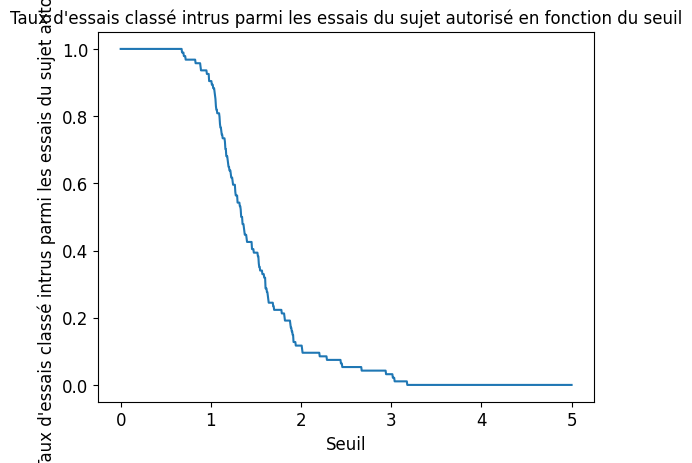

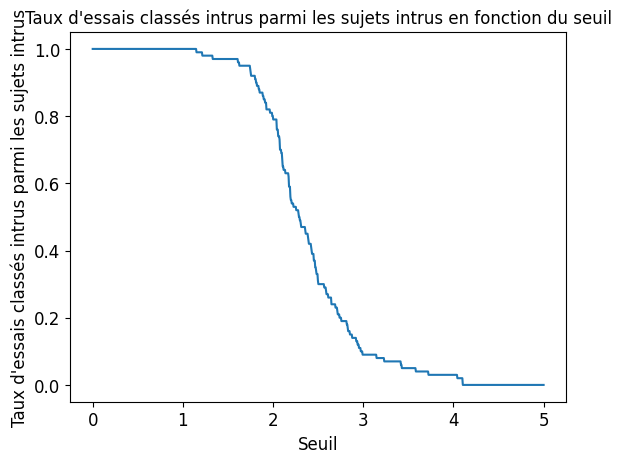

Taux de fausses alertes: 0.44680851063829785
Taux d'imposteurs non considéré comme tel: 0.02319148936170213


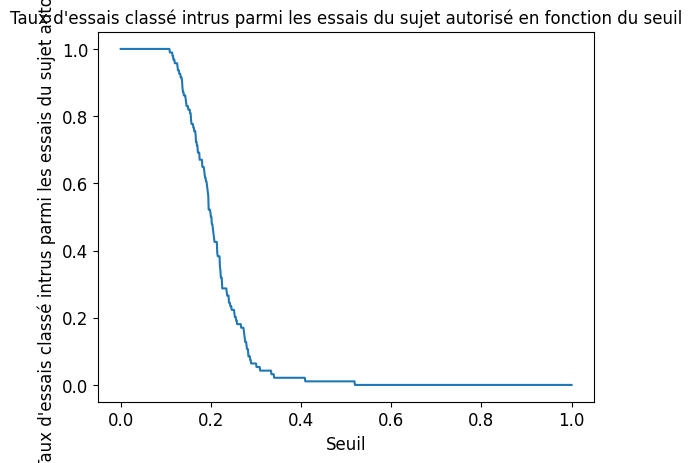

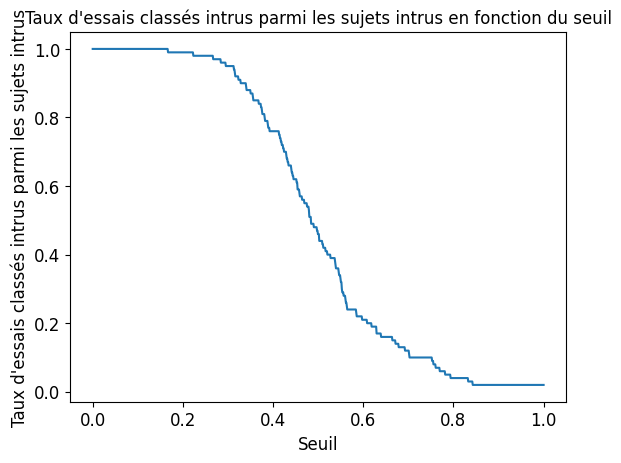

Taux de fausses alertes: 0.26595744680851063
Taux d'imposteurs non considéré comme tel: 0.009680851063829788


In [4]:
#Classification par anomalie
#Distance = norme

from scipy.stats import entropy

k=27

X_train_anomalie=np.zeros((188 + 2*50,21))

for i in range (188) :
    X_train_anomalie[i:(i+1),:]=X[k*188+i:k*188+(i+1),:]
for i in range (51) :
    if i !=k:
        X_train_anomalie[188+2*i:188+(2*i+2),:]=X[188*(i+1):188*(i+1)+2,:]


X_autorise=X[188*k:188*k+188//2,:]
X_autorise_mean=np.zeros((1,21))
for j in range(21):
    X_autorise_mean[0,j]=np.mean([X_autorise[p,j] for p in range(188//2)])
X_autorise_autre=X[188*k+188//2:188*(k+1),:]
X_autorise_dist=np.zeros(94)
for i in range(94):
    X_autorise_dist[i]=np.linalg.norm(X_autorise_autre[i] - X_autorise_mean)
X_autorise_dist.sort()

X_intru=X_train_anomalie[188:,:]
X_intru_dist=np.zeros(2*50)
for i in range(2*50):
    X_intru_dist[i]=np.linalg.norm(X_intru[i] - X_autorise_mean)

Yseuil=np.linspace(0.0001,1,1000)


Wrong_alert=[] # Taux de fausses alarmes ie d'essais détéctés comme anomalie de l'individu considéré
for i in Yseuil:
    c=0
    for j in X_autorise_dist:
        if j>i:
            c+=1
    c=c/len(X_autorise_dist)
    Wrong_alert.append(c)

plt.figure()
plt.plot(Yseuil,Wrong_alert)
plt.xlabel("Seuil", fontsize=12)
plt.ylabel("Taux d'essais classé intrus parmi les essais du sujet autorisé ",fontsize=12)
plt.title("Taux d'essais classé intrus parmi les essais du sujet autorisé en fonction du seuil", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

Right_prediction=[] # Taux d'essais d'autres individus (imposteurs) considérés comme des anomalies (c'est ce qui est voulu)
for i in Yseuil:
    c=0
    for j in X_intru_dist:
        if j>=i:
            c+=1
    c=c/len(X_intru_dist)
    Right_prediction.append(c)

plt.figure()
plt.plot(Yseuil,Right_prediction)
plt.xlabel("Seuil",fontsize=12)
plt.ylabel("Taux d'essais classés intrus parmi les sujets intrus ",fontsize=12)
plt.title("Taux d'essais classés intrus parmi les sujets intrus en fonction du seuil",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()


seuil_anomalie=0.45


c=0
r=0
for i in range(len(X)):
    d=np.linalg.norm(X[i] - X_autorise_mean)

    if d>seuil_anomalie:
        if 188*k<=i<188*(k+1):
            c+=1
    else:
        if not 188*k<=i<188*(k+1):
            r+=1
c=c/188
r=r/(188*50)
print('Taux de fausses alertes:', c)
print('Taux d imposteurs non considéré comme tel:', r)

#distance = somme valeur absolue des écarts
X_train_anomalie = np.zeros((188 + 2 * 50, 21))

for i in range(188):
    X_train_anomalie[i:(i+1), :] = X[k*188 + i:k*188 + (i+1), :]
for i in range(51):
    if i != k:
        X_train_anomalie[188 + 2*i:188 + (2*i + 2), :] = X[188*(i+1):188*(i+1) + 2, :]

X_autorise = X[188*k:188*k + 188//2, :]
X_autorise_mean = np.zeros((1, 21))
for j in range(21):
    X_autorise_mean[0, j] = np.mean([X_autorise[p, j] for p in range(188//2)])
X_autorise_autre = X[188*k + 188//2:188*(k+1), :]
X_autorise_dist = np.zeros(94)
for i in range(94):
    X_autorise_dist[i] = np.sum(np.abs(X_autorise_autre[i] - X_autorise_mean))
X_autorise_dist.sort()

X_intru = X_train_anomalie[188:, :]
X_intru_dist = np.zeros(2 * 50)
for i in range(2 * 50):
    X_intru_dist[i] = np.sum(np.abs(X_intru[i] - X_autorise_mean))

Yseuil = np.linspace(0.0001, 5, 1000)

Wrong_alert = []  # Taux de fausses alarmes
for i in Yseuil:
    c = sum(j > i for j in X_autorise_dist) / len(X_autorise_dist)
    Wrong_alert.append(c)

plt.figure()
plt.plot(Yseuil, Wrong_alert)
plt.xlabel("Seuil", fontsize=12)
plt.ylabel("Taux d'essais classé intrus parmi les essais du sujet autorisé", fontsize=12)
plt.title("Taux d'essais classé intrus parmi les essais du sujet autorisé en fonction du seuil", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

Right_prediction = []  # Taux de détection des imposteurs
for i in Yseuil:
    c = sum(j >= i for j in X_intru_dist) / len(X_intru_dist)
    Right_prediction.append(c)

plt.figure()
plt.plot(Yseuil, Right_prediction)
plt.xlabel("Seuil", fontsize=12)
plt.ylabel("Taux d'essais classés intrus parmi les sujets intrus", fontsize=12)
plt.title("Taux d'essais classés intrus parmi les sujets intrus en fonction du seuil", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

seuil_anomalie = 1.5

c = 0  # Fausses alertes
r = 0  # Imposteurs non détectés
for i in range(len(X)):
    d = np.sum(np.abs(X[i] - X_autorise_mean))
    if d > seuil_anomalie:
        if 188*k <= i < 188*(k+1):
            c += 1
    else:
        if not 188*k <= i < 188*(k+1):
            r += 1
c = c / 188
r = r / (188 * 50)
print('Taux de fausses alertes:', c)
print("Taux d'imposteurs non considéré comme tel:", r)


X_train_anomalie = np.zeros((188 + 2 * 50, 21))

for i in range(188):
    X_train_anomalie[i:(i+1), :] = X[k*188 + i:k*188 + (i+1), :]
for i in range(51):
    if i != k:
        X_train_anomalie[188 + 2*i:188 + (2*i + 2), :] = X[188*(i+1):188*(i+1) + 2, :]

X_autorise = X[188*k:188*k + 188//2, :]
X_autorise_mean = np.zeros((1, 21))
for j in range(21):
    X_autorise_mean[0, j] = np.mean([X_autorise[p, j] for p in range(188//2)])
X_autorise_autre = X[188*k + 188//2:188*(k+1), :]
X_autorise_dist = np.zeros(94)
for i in range(94):
    X_autorise_dist[i] = np.sum(np.abs(X_autorise_autre[i, ::2] - X_autorise_mean[0, ::2]))
X_autorise_dist.sort()

X_intru = X_train_anomalie[188:, :]
X_intru_dist = np.zeros(2 * 50)
for i in range(2 * 50):
    X_intru_dist[i] = np.sum(np.abs(X_intru[i, ::2] - X_autorise_mean[0, ::2]))

Yseuil = np.linspace(0.0001, 1, 1000)

Wrong_alert = []  # Taux de fausses alarmes
for i in Yseuil:
    c = sum(j > i for j in X_autorise_dist) / len(X_autorise_dist)
    Wrong_alert.append(c)

plt.figure()
plt.plot(Yseuil, Wrong_alert)
plt.xlabel("Seuil", fontsize=12)
plt.ylabel("Taux d'essais classé intrus parmi les essais du sujet autorisé", fontsize=12)
plt.title("Taux d'essais classé intrus parmi les essais du sujet autorisé en fonction du seuil", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

Right_prediction = []  # Taux de détection des imposteurs
for i in Yseuil:
    c = sum(j >= i for j in X_intru_dist) / len(X_intru_dist)
    Right_prediction.append(c)

plt.figure()
plt.plot(Yseuil, Right_prediction)
plt.xlabel("Seuil", fontsize=12)
plt.ylabel("Taux d'essais classés intrus parmi les sujets intrus", fontsize=12)
plt.title("Taux d'essais classés intrus parmi les sujets intrus en fonction du seuil", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

seuil_anomalie = 0.25

c = 0  # Fausses alertes
r = 0  # Imposteurs non détectés
for i in range(len(X)):
    d = np.sum(np.abs(X[i, ::2] - X_autorise_mean[0, ::2]))
    if d > seuil_anomalie:
        if 188*k <= i < 188*(k+1):
            c += 1
    else:
        if not 188*k <= i < 188*(k+1):
            r += 1
c = c / 188
r = r / (188 * 50)
print('Taux de fausses alertes:', c)
print("Taux d'imposteurs non considéré comme tel:", r)



 ###### AUTANT DE CLASSES QUE DE SUJETS ######
Taux d'erreur:  0.221


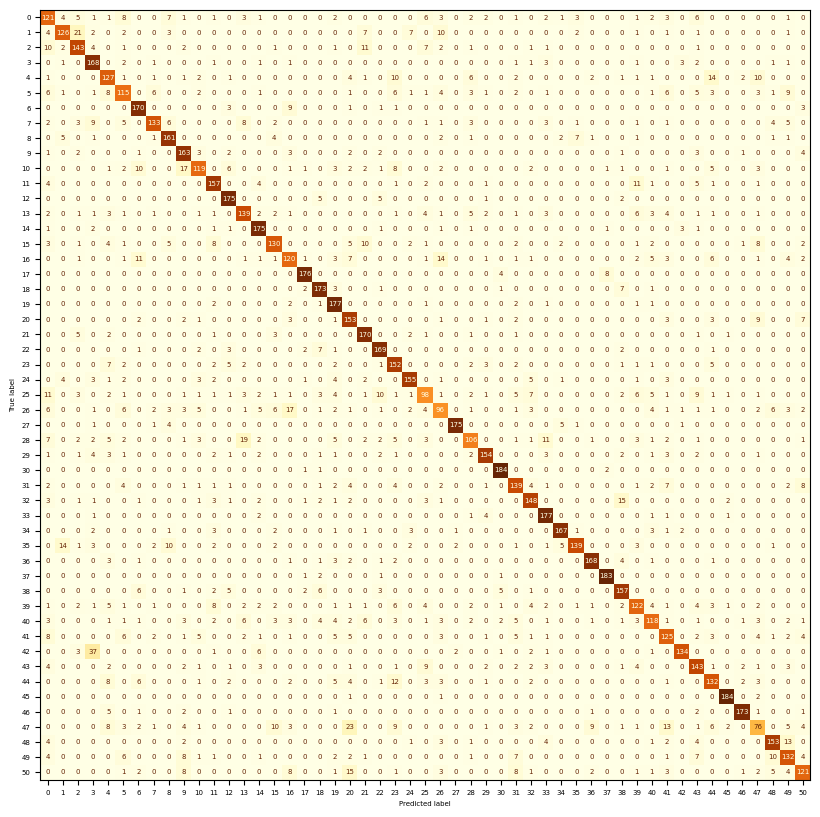

score :  [0.76875    0.69583333 0.77291667 0.77916667 0.76666667 0.77291667
 0.7875     0.73541667 0.77453027 0.75574113 0.76200418 0.81419624
 0.78496868 0.74321503 0.73277662 0.81002088 0.76409186 0.81210856
 0.78705637 0.782881  ]
sigma :  0.027884574549917933
coeff de variation :  0.03620725001294477
Amplitude relative :  0.15369054402747848
taux de bien prédits en moyenne: 0.7701378740431454
Précision du modèle naif: 0.018773474178403752


In [7]:
#Autant de classe que de sujet
from sklearn.dummy import DummyClassifier

print("\n ###### AUTANT DE CLASSES QUE DE SUJETS ######" )
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)#
yhat = lda.predict(X)#
errl=sum(y!=yhat)/len(y) #
print("Taux d'erreur: ",round(errl,3))
plt.rcParams.update({'figure.figsize': (10,10),'font.size': 5})
conf_mat =  confusion_matrix(y,yhat) #
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

score=cross_val_score(lda, X,y,cv=20) #
print("score : ",score)
print("sigma : ",score.std())
print("coeff de variation : ",score.std()/np.mean(score))
print("Amplitude relative : ",(score.max() - score.min()) / np.mean(score))
print("taux de bien prédits en moyenne:",np.mean(score))

dummy = DummyClassifier(strategy="most_frequent")  # Toujours prédire la classe majoritaire
baseline_scores = cross_val_score(dummy, X, y, cv=15)

print("Précision du modèle naif:", baseline_scores.mean())